# Non-Ergodic GMM Regression (Type-1) using STAN, PyStan Library

This notebook is used to estimate the non-ergodic coefficients and hyper-parameters of a type-1 non-ergodic GMM though Gaussian Process regression using the Bayesian software STAN. 

The Type-1 GMM compnents are:
- The non-ergodic effects are modeled by:
  - $\delta c_{0}$:    constant shift of non-ergodic GMM with respect to base ergodic GMM
  - $\delta c_{1,e}$:  spatially varying eathquake adjustment as a function of the earthquake coordinates
  - $\delta c_{1a,s}$: spatially varying site adjustment as a function of the site coordinates
  - $\delta c_{1b,s}$: spatially independent site adjustment as a function of the station id
- The aleatory variability is captured by:
  - $\delta B^0_{e}$: between-event aleatory term
  - $\delta W^0_{e,s}$: within-event aleatory term
- The non-ergodic hyperparameters are:
  - $\ell_{1,e}$:    correlation lenght of spatially varying earthquake adjustment
  - $\ell_{1a,s}$:   correlation lenght of spatially varying site adjustment
  - $\omega_{1,e}$:  scale of spatially varying earthquake adjustment 
  - $\omega_{1a,s}$: scale of spatially varying site adjustment
  - $\omega_{1b,s}$: scale of spatially independent site adjustment
  - $\tau_{0}$:      standard deviation of between-event aleatory
  - $\phi_{0}$:      standard deviation of within-event aleatory

**Disclaimer:** The non-ergodic regression is perfomed on the total residuals (column ``res_name``) of a base ergodic GMM. 
The total ergodic residuals ($e_{tot}$) are defined as:
$$
e_{tot} = log(IM) - \mu_{erg}(M,R_{rup},V_{S30}, ...) 
$$
where $IM$ is the intesity parameter of interest (e.g. PGA, PSA) and $\mu_{erg}$ is mean functional form of the ergodic GMM in log space. 

## Load required libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#user functions
sys.path.insert(0,'../Python_lib/regression/pystan')
from regression_pystan_model1_unbounded_hyp import RunStan
sys.path.insert(0,'../Python_lib/plotting')
import pylib_contour_plots as pycplt

## User Input, Definition of Regression Parameters 
_The 1st synthetic dataset based on the North CA NGAWest2 is used as an example; however, the user should update the variables in this section to point to the dataset of interest._

In [2]:
#regression name
reg_name  = 'example_regression_ds1_pystan'

#regression dataset
flatfile_fname = '../../Data/Verification/synthetic_datasets/ds1_small_corr_len/CatalogNGAWest3CALite_synthetic_data_small_corr_len_Y1.csv'

#output directory
dir_out = '../../Data/Regression/example_ds1_pystan/'

#filename for stan regression code
# sm_fname = '../Stan_lib/regression_stan_model1_unbounded_hyp.stan'
# sm_fname = '../Stan_lib/regression_stan_model1_unbounded_hyp_chol.stan'
sm_fname = '../Stan_lib/regression_stan_model1_unbounded_hyp_chol_efficient.stan'
# sm_fname = '../Stan_lib/regression_stan_model1_unbounded_hyp_chol_efficient2.stan'

#stan parameters
runstan_flag = True
pystan_ver = 2
res_name = 'tot'
n_iter   = 1000
n_chains = 4
adapt_delta   = 0.8
max_treedepth = 10
#parallel options
# flag_parallel = True
flag_parallel = False


## Load Files

In [3]:
#load flatfile
df_flatfile = pd.read_csv(flatfile_fname)

## Preprocessing 
This section can be used by the user for any pre-porcessing of their dataset.

In [4]:
#keep only North records of NGAWest2
df_flatfile = df_flatfile.loc[df_flatfile.dsid==0,:]


## Run Regression

In [5]:
print(f'Running regression for:%s'%(reg_name))

#run time start
run_t_strt = time.time()
    
#run stan model
RunStan(df_flatfile, sm_fname, reg_name, dir_out, res_name, 
        runstan_flag=runstan_flag, n_iter=n_iter, n_chains=n_chains,
        adapt_delta=adapt_delta, max_treedepth=max_treedepth,
        pystan_ver=pystan_ver, pystan_parallel=flag_parallel)
       
#run time end
run_t_end = time.time()

#compute run time
run_tm = (run_t_end - run_t_strt)/60
  
#log run time
df_run_info = pd.DataFrame({'computer_name':os.uname()[1],'reg_name':reg_name,'run_time':run_tm}, 
                            index=[1])
                           
#write out run info
fname_reginfo   = '%s/run_info.csv'%(dir_out)
df_run_info.reset_index(drop=True).to_csv(fname_reginfo, index=False)

print(f'Completed regression for: %s'%(reg_name))

Running regression for:example_regression_ds1_pystan


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_52782a0a8916039e5a19073b767372d2 NOW.
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++
In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:771:
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "U

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:780:
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h: In instantiation of 'struct Eigen::internal::copy_using_evaluator_traits<Eigen::internal::evaluator<Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, -1, false> >, Eigen::internal::evaluator<Eigen::Product<Eigen::Transpose<Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, -1, false> >, Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, -1, false>, 1> >, Eigen::internal::sub_assign_op<double, double> >':
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:607:49:   required from 'class Eigen::internal::generic_dense_assignment_kernel<Eigen::internal::evaluator<Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, -1, false> >, Eigen::int

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:

In file included from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:0,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6,
                 from /home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/pystan/py_var_context.hpp:12,
                 from /tmp/pystan_3yb0phrd/stanfit4anon_model_52782a0a8916039e5a19073b767372d2_4805476471476544674.cpp:


Gradient evaluation took 1.06074 seconds
1000 transitions using 10 leapfrog steps per transition would take 10607.4 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 1.07225 seconds
1000 transitions using 10 leapfrog steps per transition would take 10722.5 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 1.14521 seconds
1000 transitions using 10 leapfrog steps per transition would take 11452.1 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 1.22708 seconds
1000 transitions using 10 leapfrog steps per transition would take 12270.8 seconds.
Adjust your expectations accordingly!




Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 159)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 159)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 154)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 154)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:   1 / 1000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 135)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 154)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of th

Iteration:  10 / 1000 [  1%]  (Warmup)
Iteration:  10 / 1000 [  1%]  (Warmup)
Iteration:  10 / 1000 [  1%]  (Warmup)
Iteration:  10 / 1000 [  1%]  (Warmup)
Iteration:  20 / 1000 [  2%]  (Warmup)
Iteration:  20 / 1000 [  2%]  (Warmup)
Iteration:  20 / 1000 [  2%]  (Warmup)
Iteration:  20 / 1000 [  2%]  (Warmup)
Iteration:  30 / 1000 [  3%]  (Warmup)
Iteration:  30 / 1000 [  3%]  (Warmup)
Iteration:  30 / 1000 [  3%]  (Warmup)
Iteration:  30 / 1000 [  3%]  (Warmup)
Iteration:  40 / 1000 [  4%]  (Warmup)
Iteration:  40 / 1000 [  4%]  (Warmup)
Iteration:  40 / 1000 [  4%]  (Warmup)
Iteration:  40 / 1000 [  4%]  (Warmup)
Iteration:  50 / 1000 [  5%]  (Warmup)
Iteration:  50 / 1000 [  5%]  (Warmup)
Iteration:  50 / 1000 [  5%]  (Warmup)
Iteration:  50 / 1000 [  5%]  (Warmup)
Iteration:  60 / 1000 [  6%]  (Warmup)
Iteration:  60 / 1000 [  6%]  (Warmup)
Iteration:  60 / 1000 [  6%]  (Warmup)
Iteration:  60 / 1000 [  6%]  (Warmup)
Iteration:  70 / 1000 [  7%]  (Warmup)
Iteration:  70 / 1000 [  

Iteration: 520 / 1000 [ 52%]  (Sampling)
Iteration: 520 / 1000 [ 52%]  (Sampling)
Iteration: 490 / 1000 [ 49%]  (Warmup)
Iteration: 580 / 1000 [ 58%]  (Sampling)
Iteration: 530 / 1000 [ 53%]  (Sampling)
Iteration: 530 / 1000 [ 53%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 590 / 1000 [ 59%]  (Sampling)
Iteration: 540 / 1000 [ 54%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 540 / 1000 [ 54%]  (Sampling)
Iteration: 510 / 1000 [ 51%]  (Sampling)
Iteration: 550 / 1000 [ 55%]  (Sampling)
Iteration: 610 / 1000 [ 61%]  (Sampling)
Iteration: 550 / 1000 [ 55%]  (Sampling)
Iteration: 520 / 1000 [ 52%]  (Sampling)
Iteration: 560 / 1000 [ 56%]  (Sampling)
Iteration: 620 / 1000 [ 62%]  (Sampling)
Iteration: 560 / 1000 [ 56%]  (Sampling)
Iteration: 530 / 1000 [ 53%]  (Sampling)
Iteration: 630 / 1000 [ 63%]  (Sampling)
Iteration: 570 / 1000 [ 57%]  (Sampling)
Iteration: 570 / 1000 [ 57%]  (Sampling)
Iteration: 540 / 100

Iteration: 980 / 1000 [ 98%]  (Sampling)
Iteration: 990 / 1000 [ 99%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 77493.3 seconds (Warm-up)
               36220.1 seconds (Sampling)
               113713 seconds (Total)



To run all diagnostics call pystan.check_hmc_diagnostics(fit)
/mnt/halcloud_nfs/glavrent/Research/Nonerg_GMM_methodology/Analyses/Regression/../Python_lib/regression/pystan/regression_pystan_model1_unbounded_hyp.py:167: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  pickle.dump({'model' : stan_model, 'fit' : stan_fit}, f, protocol=-1)
/mnt/halcloud_nfs/glavrent/Research/Nonerg_GMM_methodology/Analyses/Regression/../Python_lib/regression/pystan/regression_pystan_model1_unbounded_hyp.py:214: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stan_hyp = df_stan_hyp.append(df_stan_posterior_raw[col_names_hyp].mean(axis = 0), ignore_index=True)


Completed regression for: example_regression_ds1_pystan


## Regression Review
The next code chunks produce summary plots to review the regression fit

In [6]:
#load non-ergodic coefficients and residuals
fname_gmotion = dir_out + reg_name + '_stan_residuals.csv'
fname_coeff   = dir_out + reg_name + '_stan_coefficients.csv'
df_gmotion = pd.read_csv(fname_gmotion, index_col=0)
df_coeff   = pd.read_csv(fname_coeff, index_col=0)

#merge gm-flatfile with non-ergodic coeffs and res 
df_gmotion = pd.merge(df_flatfile[['mag','Rrup','Vs30']], df_gmotion, left_index=True, right_index=True)
df_coeff   = pd.merge(df_flatfile[['mag','Rrup','Vs30']], df_coeff,   left_index=True, right_index=True)

#print mean and standard deviations of aleatory terms
print(f'Between-event mean:\t %.3f'%df_gmotion.res_between.mean())
print(f'Within-event mean:\t %.3f'%df_gmotion.res_within.mean())
print(f'Between-event std:\t %.3f'%df_gmotion.res_between.std())
print(f'Within-event std:\t %.3f'%df_gmotion.res_within.std())

Between-event mean:	 0.007
Within-event mean:	 0.000
Between-event std:	 0.277
Within-event std:	 0.377


### Non-ergodic Residuals

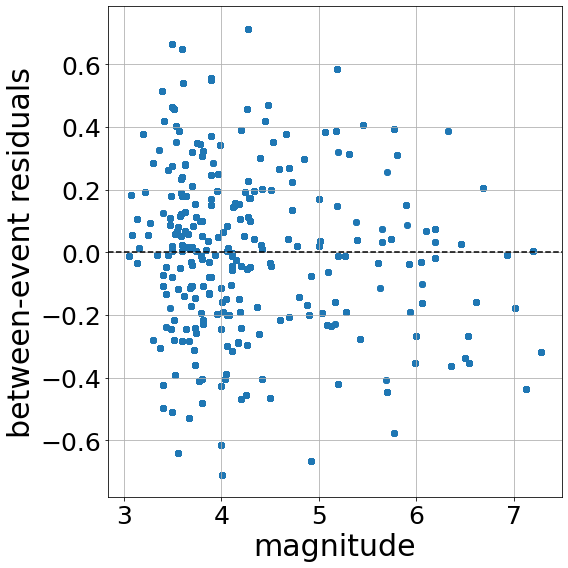

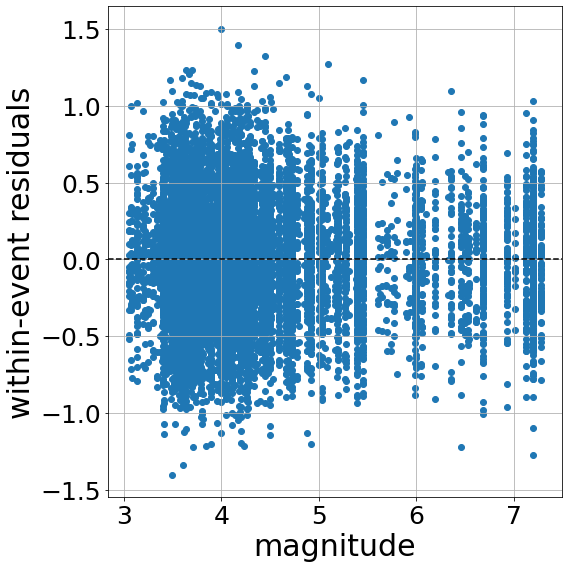

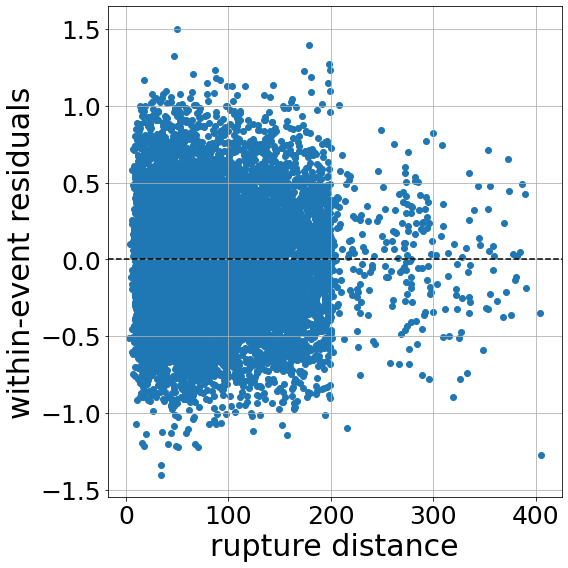

In [7]:
%matplotlib inline

#between-event residuals 
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df_gmotion.mag, df_gmotion.res_between)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel('magnitude',               fontsize=30)
ax.set_ylabel('between-event residuals', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

#within-event residuals vs mag
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df_gmotion.mag, df_gmotion.res_within)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel('magnitude',               fontsize=30)
ax.set_ylabel('within-event residuals', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

#within-event residuals vs dist
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df_gmotion.Rrup, df_gmotion.res_within)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel('rupture distance',       fontsize=30)
ax.set_ylabel('within-event residuals', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

### Non-ergodic Coefficients

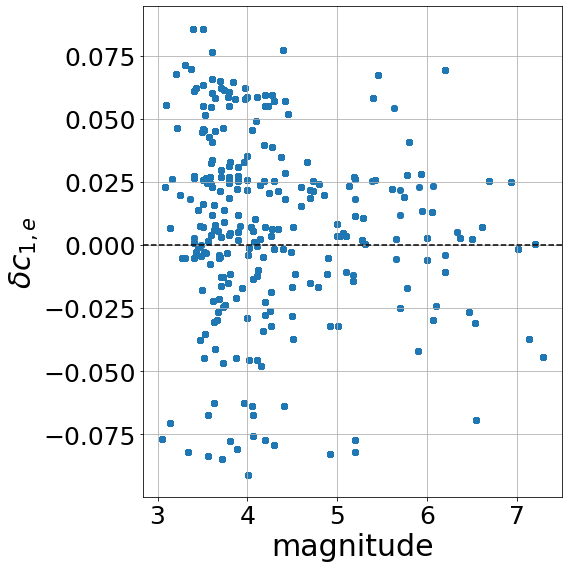

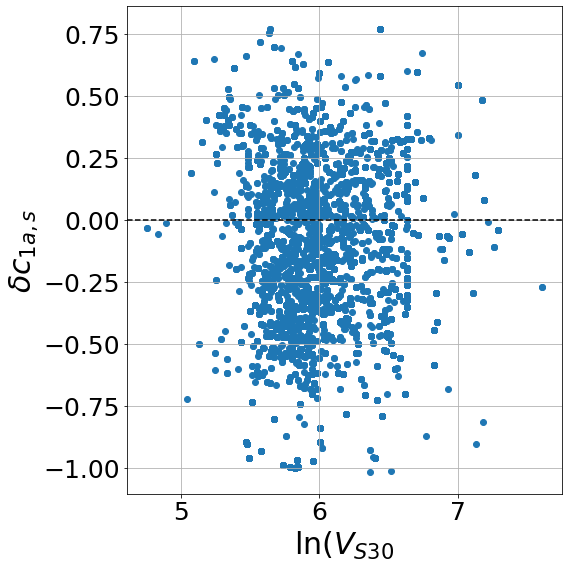

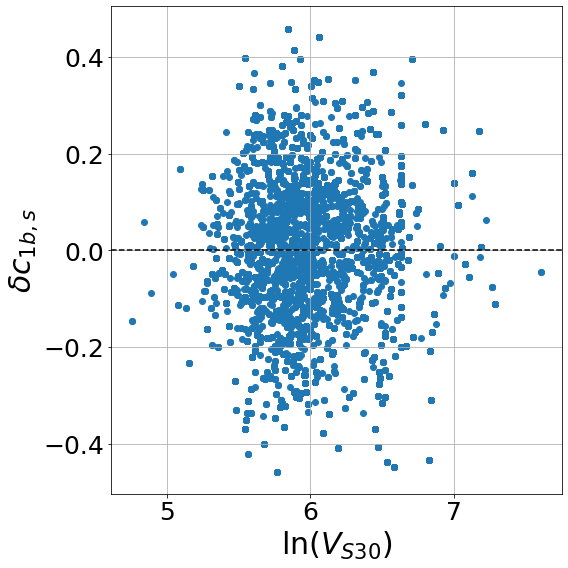

In [8]:
#spatially varying earthquake adjustment
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df_coeff.mag, df_coeff.dc_1e_mean)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel('magnitude',         fontsize=30)
ax.set_ylabel(r'$\delta c_{1,e}$', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

#spatially varying site adjustment
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(np.log(df_coeff.Vs30), df_coeff.dc_1as_mean)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel(r'$\ln(V_{S30}$',     fontsize=30)
ax.set_ylabel(r'$\delta c_{1a,s}$', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

#spatially varying site adjustment
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(np.log(df_coeff.Vs30), df_coeff.dc_1bs_mean)
ax.axhline(y=0, color='black', linestyle='--')
#figure properties
ax.set_xlabel(r'$\ln(V_{S30})$',     fontsize=30)
ax.set_ylabel(r'$\delta c_{1b,s}$', fontsize=30)
ax.grid(which='both')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
fig.tight_layout()

/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/glavrent/anaconda3/envs/python_3.8stan/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecate

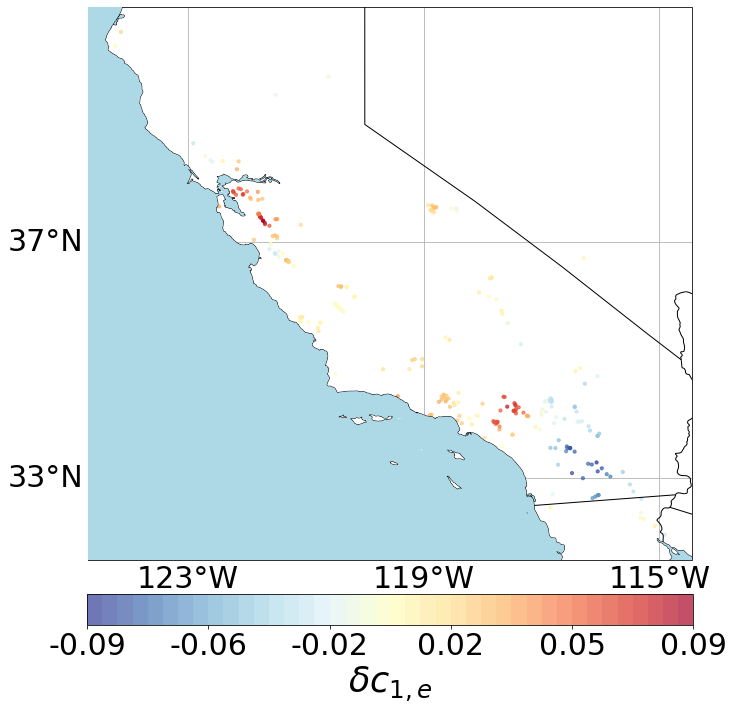

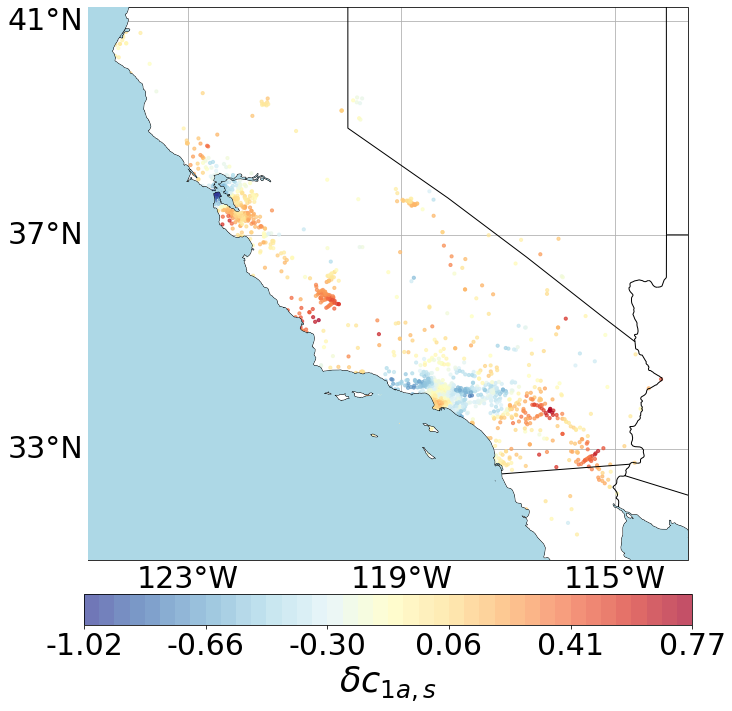

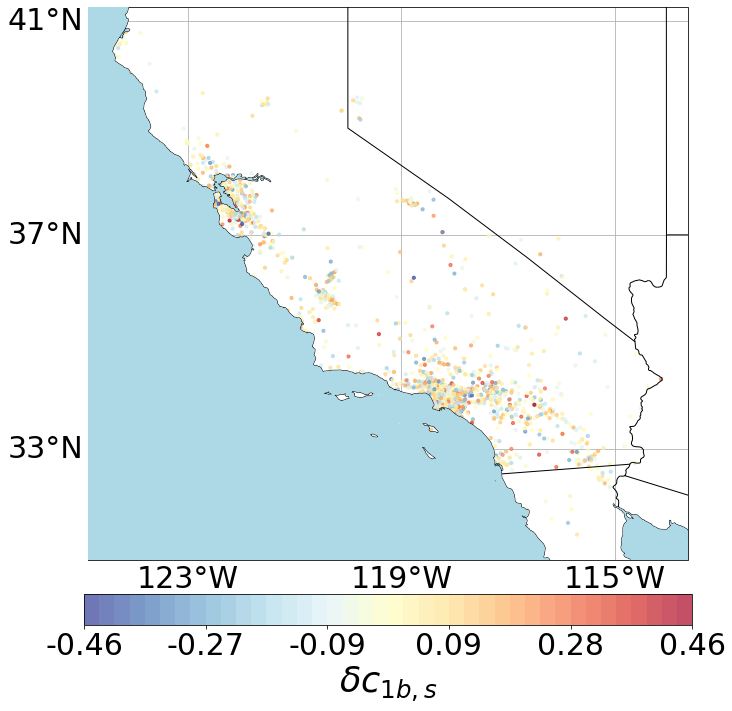

In [9]:
#earthquake indices
_, eq_idx  = np.unique(df_coeff[['eqid']].values, axis=0, return_index=True)
#station indices
_, sta_idx = np.unique(df_coeff[['ssn']].values, axis=0, return_index=True)

#spatially varying earthquake adjustment
cbar_label = r'$\delta c_{1,e}$'
data2plot  = df_coeff[['eqLat','eqLon','dc_1e_mean']].values[eq_idx,:]
fig, ax, cbar, data_crs, _ = pycplt.PlotScatterCAMap(data2plot, cmap='RdYlBu_r', log_cbar=False, frmt_clb = '%.2f')
#update colorbar 
cbar.ax.tick_params(tick1On=1, labelsize=30)
cbar.set_label(cbar_label, size=35)
#grid lines
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 30}
gl.ylabel_style = {'size': 30}
gl.xlocator = mticker.FixedLocator([-123, -119, -115])
gl.ylocator = mticker.FixedLocator([ 33,   37,   41])
#apply tight layout
fig.tight_layout()

#spatially varying site adjustment
cbar_label = r'$\delta c_{1a,s}$'
data2plot  = df_coeff[['staLat','staLon','dc_1as_mean']].values[sta_idx,:]
fig, ax, cbar, data_crs, _ = pycplt.PlotScatterCAMap(data2plot, cmap='RdYlBu_r', log_cbar=False, frmt_clb = '%.2f')
#update colorbar 
cbar.ax.tick_params(tick1On=1, labelsize=30)
cbar.set_label(cbar_label, size=35)
#grid lines
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 30}
gl.ylabel_style = {'size': 30}
gl.xlocator = mticker.FixedLocator([-123, -119, -115])
gl.ylocator = mticker.FixedLocator([ 33,   37,   41])
#apply tight layout
fig.tight_layout()

#spatially independent site adjustment
cbar_label = r'$\delta c_{1b,s}$'
data2plot  = df_coeff[['staLat','staLon','dc_1bs_mean']].values[sta_idx,:]
fig, ax, cbar, data_crs, _ = pycplt.PlotScatterCAMap(data2plot, cmap='RdYlBu_r', log_cbar=False, frmt_clb = '%.2f')
#update colorbar 
cbar.ax.tick_params(tick1On=1, labelsize=30)
cbar.set_label(cbar_label, size=35)
#grid lines
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 30}
gl.ylabel_style = {'size': 30}
gl.xlocator = mticker.FixedLocator([-123, -119, -115])
gl.ylocator = mticker.FixedLocator([ 33,   37,   41])
#apply tight layout
fig.tight_layout()